# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os


In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age     workclass  fnlwgt     education  education-num  \
17800   25       Private  130302       HS-grad              9   
7645    60       Private   85413       HS-grad              9   
14266   65       Private  150095     Bachelors             13   
14966   20       Private  223811       HS-grad              9   
28658   47       Private   78529     Bachelors             13   
3836    52  Self-emp-inc   90363   Prof-school             15   
1719    38       Private  187069       HS-grad              9   
17414   49             ?  178215  Some-college             10   
8568    45       Private  377757           9th              5   
15049   27  Self-emp-inc  113870       Masters             14   

           marital-status         occupation   relationship   race     sex  \
17800       Never-married  Handlers-cleaners      Unmarried  White    Male   
7645   Married-civ-spouse   Transport-moving        Husband  White    Male   
14266  Married-civ-spouse    Exec-managerial        Husband  White    Male   
14966       Never-married  Handlers-cleaners  Not-in-family  White    Male   
28658  Married-civ-spouse              Sales        Husband  White    Male   
3836   Married-civ-spouse     Prof-specialty        Husband  White    Male   
1719   Married-civ-spouse   Transport-moving        Husband  White    Male   
17414             Widowed                  ?      Unmarried  White  Female   
8568   Married-civ-spouse   Transport-moving        Husband  White    Male   
15049       Never-married   Transport-moving      Own-child  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
17800             0             0              40  United-States  <=50K  
7645              0             0              44  United-States   >50K  
14266             0             0              40  United-States   >50K  
14966             0             0              40  United-States  <=50K  
28658             0             0              60  United-States   >50K  
3836          99999             0              35  United-States   >50K  
1719              0             0              45  United-States  <=50K  
17414             0             0              28  United-States  <=50K  
8568              0             0              40  United-States  <=50K  
15049             0             0              40  United-States  <=50K

## Analyze hours-per-week Target Distribution

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


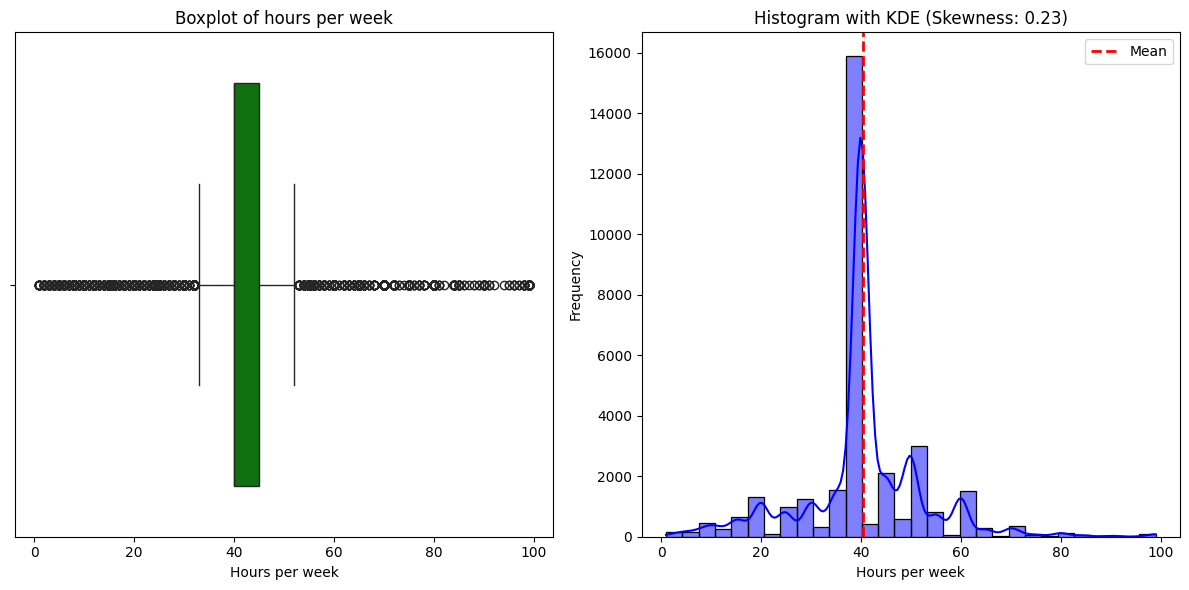

In [3]:
#Analyze the statistics of hours-per-week
HPW_stats = data['hours-per-week'].describe()
print(HPW_stats)

#Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness

plt.figure(figsize=(12, 6))

#Boxplot to visualize outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=data["hours-per-week"], color="green")
plt.xlabel("Hours per week")
plt.title("Boxplot of hours per week")

# Calculate skewness
skewness = data["hours-per-week"].skew()

# Display skewness
plt.subplot(1, 2, 2)
sns.histplot(data["hours-per-week"], bins=30, kde=True, color='blue')
plt.axvline(data["hours-per-week"].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel("Hours per week")
plt.ylabel("Frequency")
plt.title(f"Histogram with KDE (Skewness: {skewness:.2f})")
plt.legend()

#Save the figure
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "hours_per_week_visualizations.png")
plt.savefig(save_path, dpi=300)

# Show the plots
plt.tight_layout()
plt.show()

Boxplot: Shows potential outliers in the distribution. There are a few extreme values around 99 hours per week, indicating possible anomalies.

Histogram with KDE: Provides a smoothed distribution of working hours. The red dashed line represents the mean working hours per week.

Skewness value: The skewness is 0.23 which indicates a slightly right-skewed distribution. This suggests that most people work around 40 hours per week, but a small number of individuals work significantly more.

## Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

In [4]:
descriptive_statistics = data.describe()
print(descriptive_statistics)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Check for missing values and report the number and percentage of missing data for each column

In [5]:
#Check for missing values in each column

print(data.isnull().sum())

#Some datasets use "?" or "unknown" instead of actual missing values

print(data.replace("?", None).isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [6]:
#Replace "?" with NaN
data.replace("?", np.nan, inplace=True)
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [7]:
# Counting the number of missing values per column
missing_counts = data.isnull().sum()

#Calculating the percentage of missing values in each column
missing_percentages = (missing_counts / len(data)) * 100

#Creating a DataFrame to summarize missing data information

missing_summary = pd.DataFrame({
    'Missing count': missing_counts,
    'Missing percentage (%)': missing_percentages
})

#Filtering to display only columns with missing values
missing_filtered = missing_summary[missing_summary['Missing count'] > 0]

# Sorting by highest percentage of missing values
missing_filtered = missing_filtered.sort_values(by='Missing percentage (%)', ascending=False)

#Display the missing data summary
print(missing_filtered)

                Missing count  Missing percentage (%)
occupation               1843                5.660146
workclass                1836                5.638647
native-country            583                1.790486


## Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality

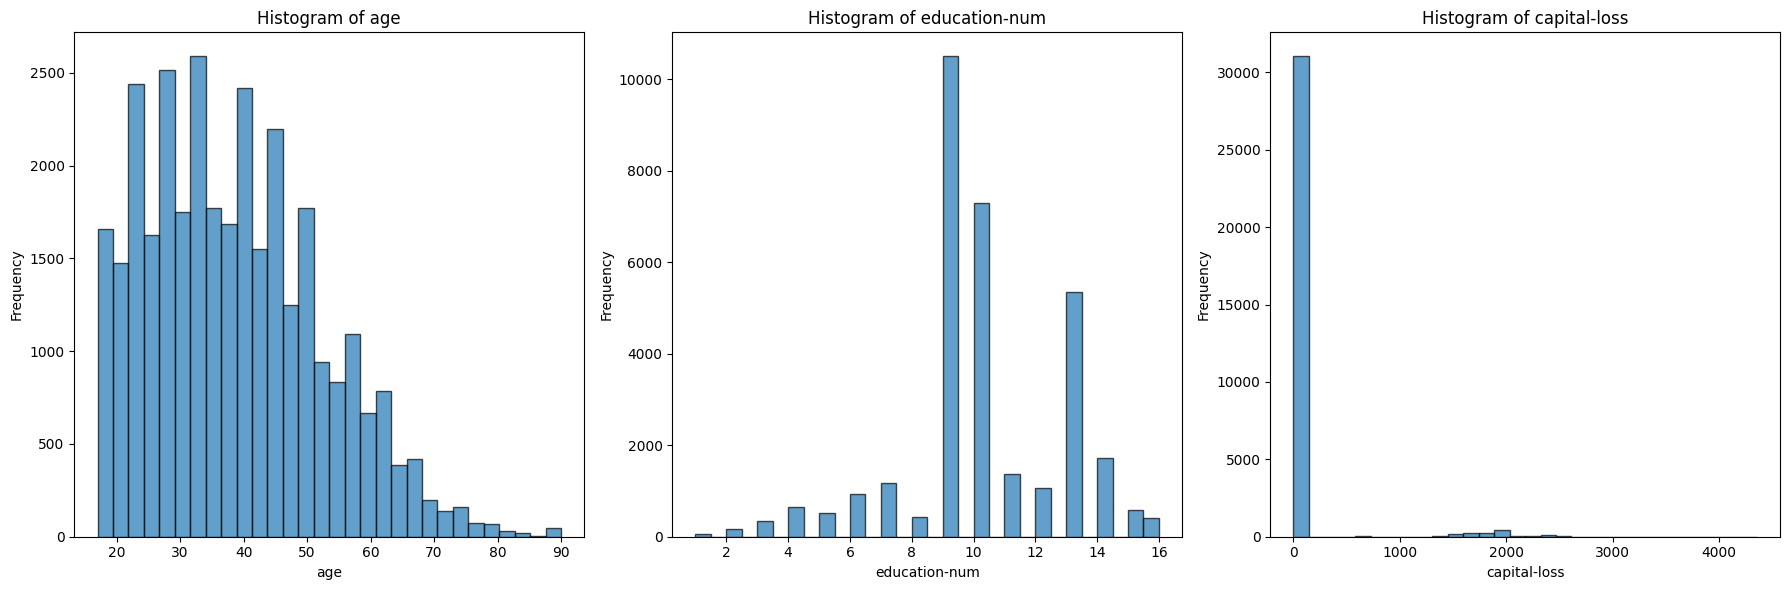

In [8]:
#Selecting the numerical columns to plot
numerical_columns = ["age", "education-num", "capital-loss"]

#Creating histograms
plt.figure(figsize=(18, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(data[col], bins=30, alpha=0.7, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

#Adjust layout
plt.tight_layout()

#Save the figure
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "histograms_numerical_cols.png")
plt.savefig(save_path, dpi=300)

# Show the plot
plt.show()



### Age distribution:

The histogram for age appears right-skewed, meaning there are more young and middle-aged individuals in the dataset with fewer older individuals. The distribution is unimodal with a peak around 30-40 years. There are a few individuals above 70, but the frequency decreases significantly as age increases.

### Number of years of formal education distribution:

The number of years of formal education is also right-skewed, but to a lesser degree. The most common education levels (mapped to numerical values) appear around 9 to 13, suggesting that a high school diploma and bachelor's degree are the most common educational attainments. The distribution is multimodal with noticeable peaks around high school and bachelor's degree levels.

### Capital Loss distribution:

This distribution is highly skewed (extremely right-skewed) because most values are zero. Only a small fraction of individuals report any capital loss and the histogram shows that when it does occur, it takes on a few specific values rather than being smoothly spread. This suggests that capital loss is not a common attribute and occurs in specific cases rather than uniformly across the population.

## Generate bar plots for at least three categorical columns and discuss the frequency distributions

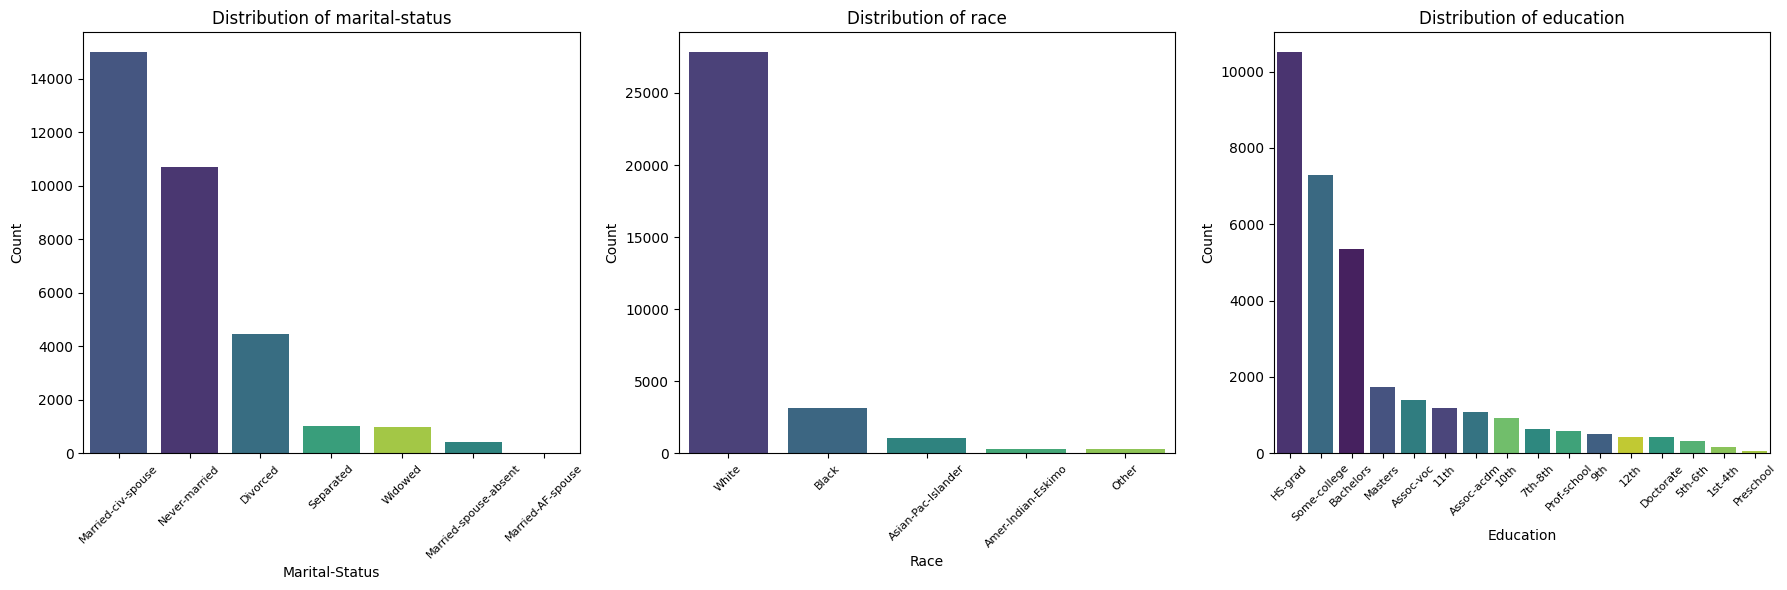

In [9]:
# Selecting categorical columns for analysis
categorical_columns = ['marital-status', 'race', 'education']

#Generate bar charts for each categorical variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[idx], order=data[col].value_counts().index, palette="viridis", hue=col)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col.replace('_', ' ').title())
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)

#Adjust layout
plt.tight_layout()

#Save the bar plots
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "bar_plots_categorical_cols.png")
plt.savefig(save_path, dpi=300)

#Display the visualization
plt.show()

### Marital status distribution:

The majority of individuals fall into the "Married-civ-spouse" category indicating a high percentage of married individuals in the dataset. "Never-married" is the second largest group showing a significant portion of individuals who have never been married. Divorced, Separated, Widowed and Married-spouse-absent categories have relatively smaller counts indicating fewer individuals in these marital statuses.

### Race distribution:

The dataset is predominantly composed of individuals identified as "White" making them the most represented racial group. "Black" individuals form the second-largest group, while "Asian-Pac-Islander", "Amer-Indian-Eskimo" and "Other" have significantly smaller counts. This distribution suggests a racial imbalance in the dataset which might impact any model trained on this data if race is used as a predictor.

### Education distribution:

The most common education levels are "HS-grad" (high school graduate), "Some-college" and "Bachelors" indicating that most individuals have at least completed high school. Higher education levels like masters and doctorate have fewer counts but still hold significance. Lower education levels (e.g. "1st-4th", "5th-6th", "Preschool") are rare, showing that very few individuals in the dataset have not attended school beyond elementary levels.

## Identify outliers in at least one numerical column using boxplots

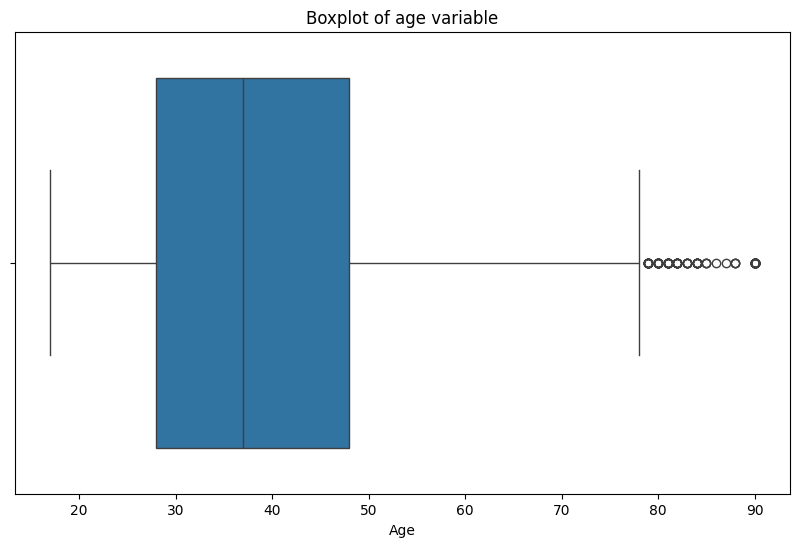

In [10]:
#Create boxplot with colored outliers
plt.figure(figsize=(10, 6))
sns.boxplot( x=data["age"])

plt.title("Boxplot of age variable")
plt.xlabel("Age")

#Save the boxplot
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "boxplot_age_outliers.png")
plt.savefig(save_path, dpi=300)

#Display the boxplot
plt.show()

The distribution is right-skewed with individuals aged 78 years and older classified as outliers. These outliers extend beyond the upper whisker, indicating the presence of individuals who are significantly older than the majority of the population. In contrast, there are no lower outliers, suggesting that the dataset does not include exceptionally young individuals outside the expected age range.

## Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target

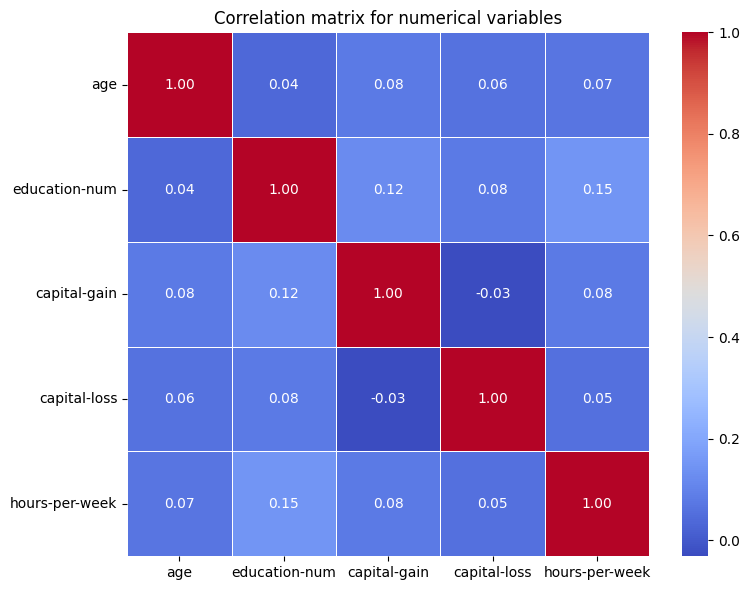

In [11]:
#Define the numerical variables to analyze
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

#Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

#Generate a heatmap to visually represent the correlation strengths
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix for numerical variables')

#Adjust layout
plt.tight_layout()

#Save the heatmap as a PNG file
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "heatmap_numerical_vars.png")
plt.savefig(save_path, dpi=300)

#Display the heatmap
plt.show()

The correlation matrix reveals that the strongest correlation between hours-per-week and other numerical variables is with education-num (0.15) suggesting that individuals with higher education levels tend to work slightly more hours per week. However, this correlation remains weak indicating that education alone does not significantly determine work hours. The weakest correlation is with capital-loss (0.05) implying that capital losses have almost no impact on the number of hours a person works per week. Other variables such as age (0.07) and capital-gain (0.08) show only minor positive correlations, suggesting that older individuals and those with higher capital gains may work slightly more, but the relationship is not substantial. 

## Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week

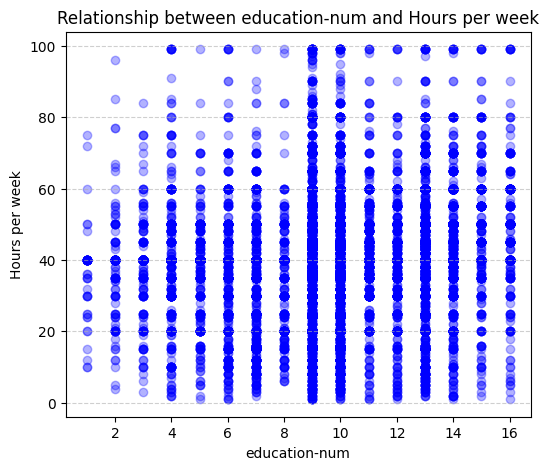

In [12]:
#Select the most correlated variable
selected_variable = "education-num"

#Create scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(data[selected_variable], data["hours-per-week"], alpha=0.3, color='blue', marker='o')

# Add grid and labels
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title(f'Relationship between {selected_variable} and Hours per week')
plt.xlabel(selected_variable)
plt.ylabel("Hours per week")

#Save the scatter plot as a PNG file
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "scatterplot_education_num_vs_target.png")
plt.savefig(save_path, dpi=300)

# Show the plot
plt.show()

Trends that can be observed:

Diverse work hours across education levels: there is a wide range of working hours at almost every education level with values spanning from close to 0 up to 100 hours per week. This suggests that education alone is not a strong determinant of working hours.

Slight upward trend: higher education levels tend to be associated with slightly higher average working hours. This can be seen in the denser clustering of points around 40 hours per week at higher education levels.

Peak at common education levels: certain education levels, such as 9-10 and 13-16 years of education, show denser vertical clustering. This likely corresponds to high school, bachelor's and postgraduate education levels where a significant number of people work standard full-time hours.

While the relationship is not strongly linear, there is a mild positive correlation where individuals with more education appear to work slightly more hours per week on average.

## Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots

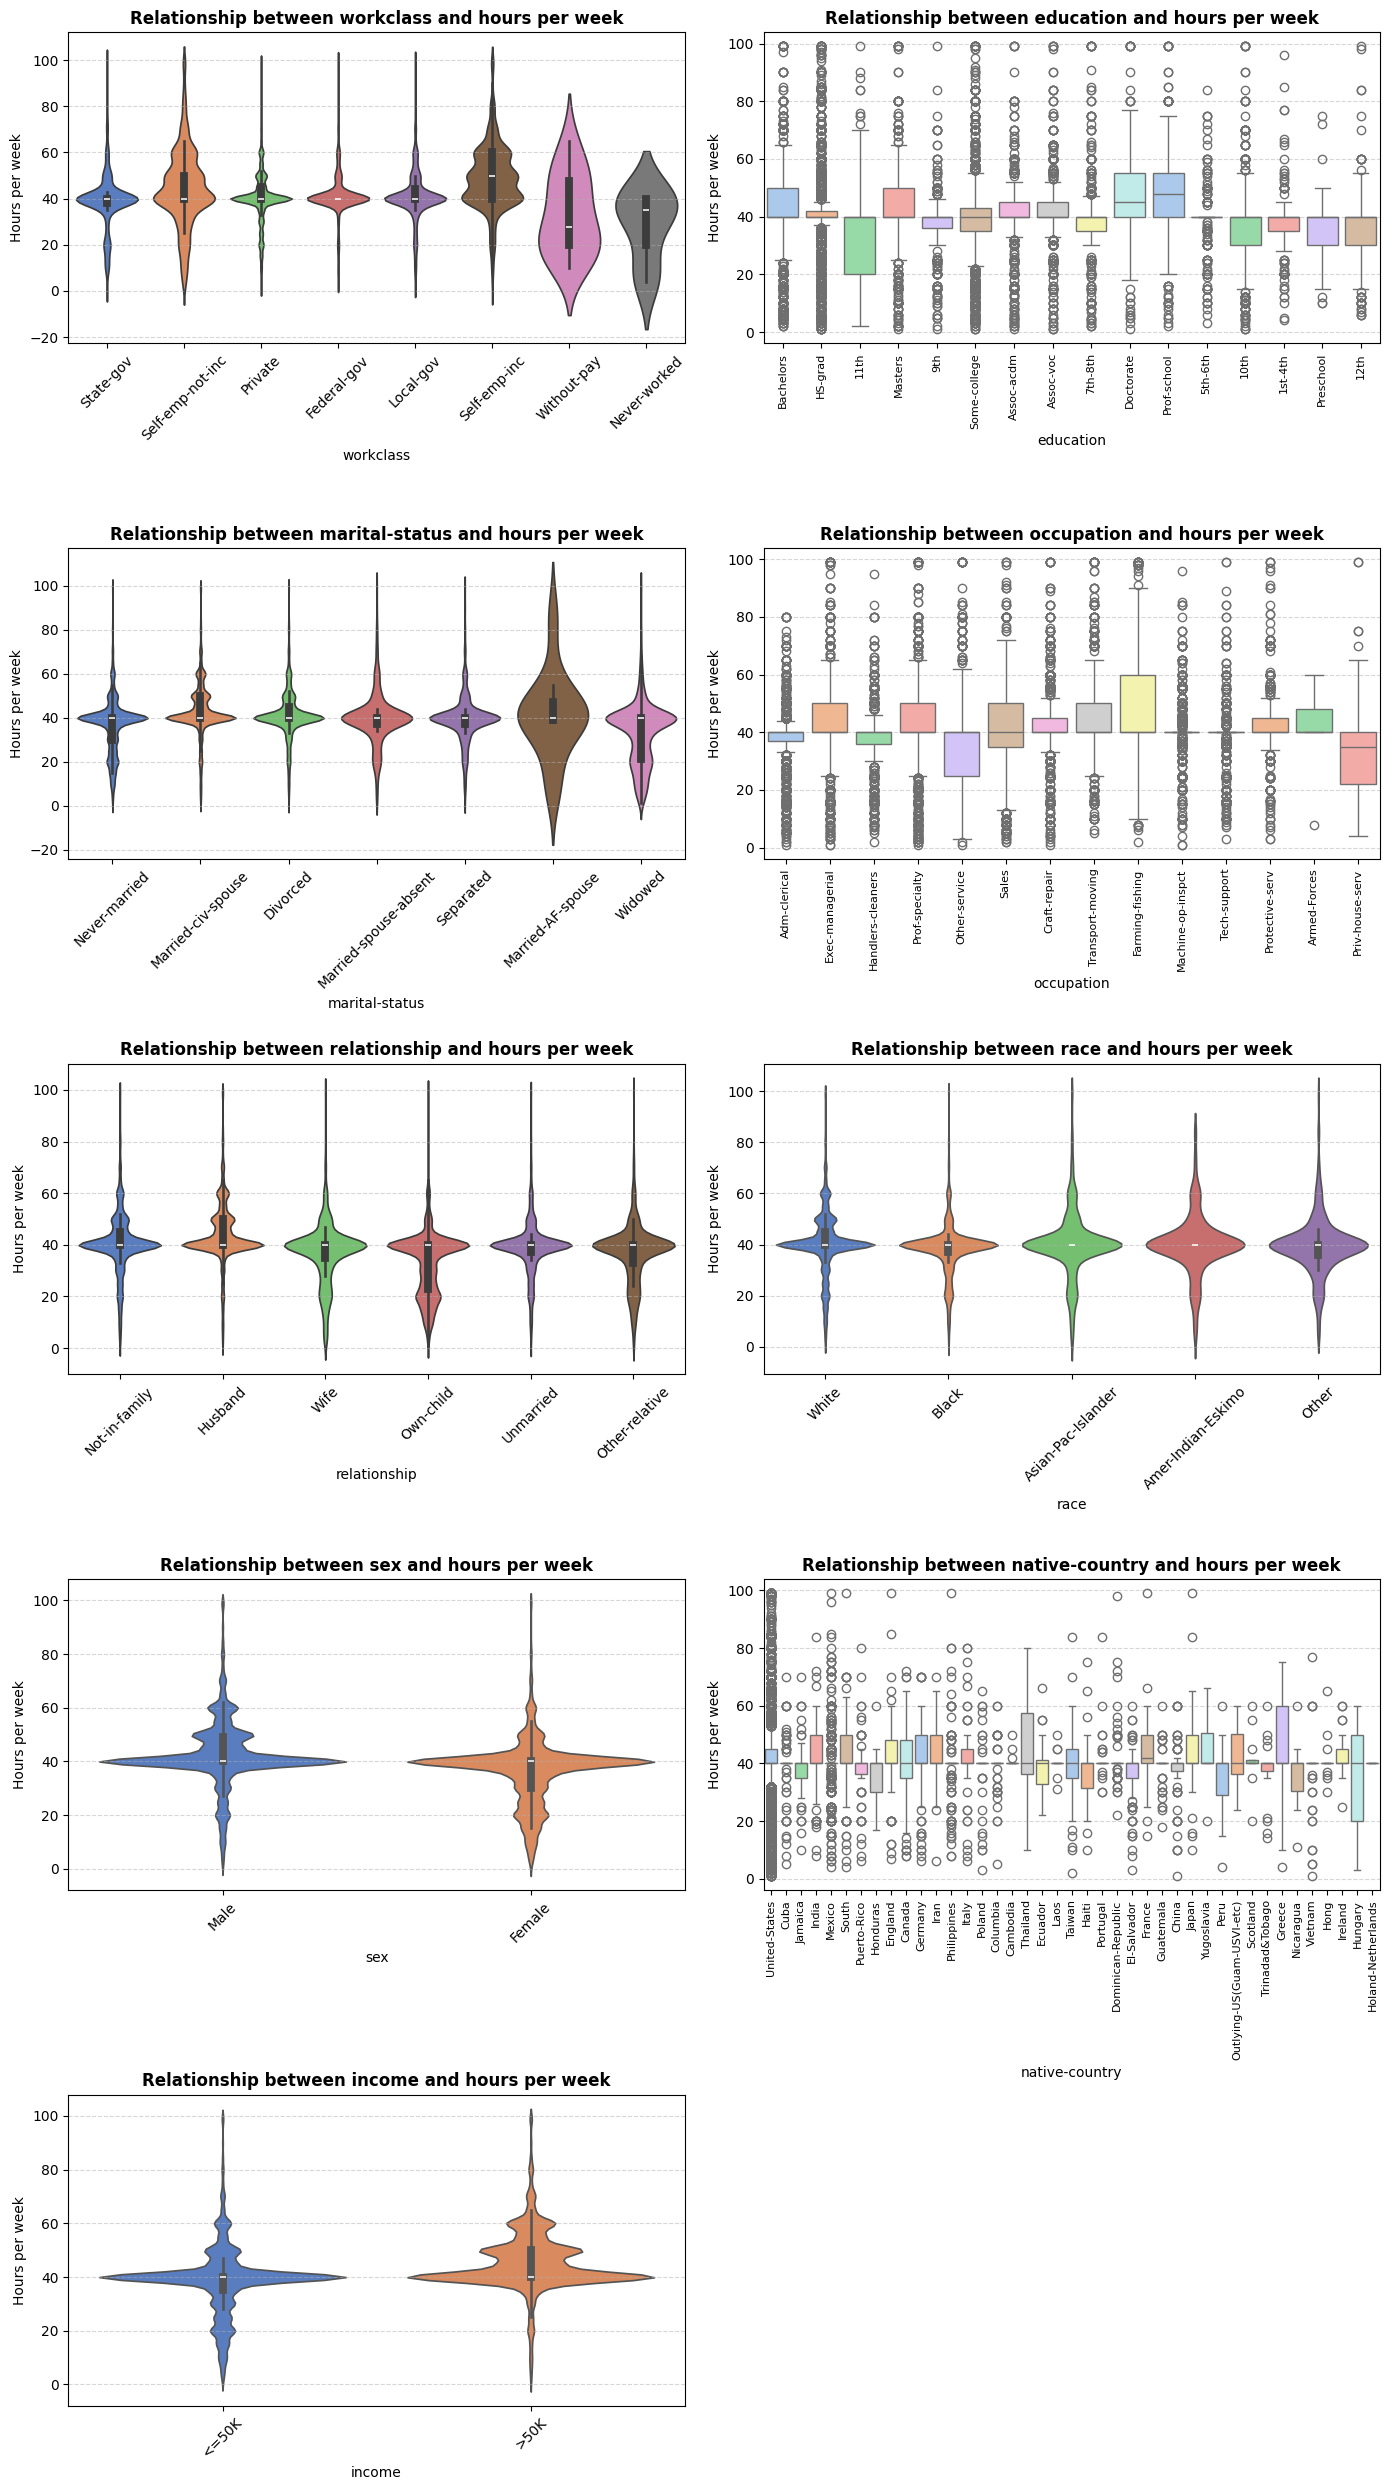

In [15]:
#Select categorical columns for analysis
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

#Set the number of rows and columns
num_columns = 2
num_rows = math.ceil(len(categorical_columns) / num_columns)

#Create subplots for all categorical variables
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(14, 5 * num_rows))
axes = axes.flatten()

#Generate violin plots for each categorical variable
for i, var in enumerate(categorical_columns):
    #If the variable has too many unique categories, switch to boxplot for better readability
    if data[var].nunique() > 10:
        sns.boxplot(
            data=data,
            x=var,
            y="hours-per-week",
            hue=var,
            ax=axes[i],
            palette="pastel",
            legend=False
        )
        axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    else:
        sns.violinplot(
            data=data,
            x=var,
            y="hours-per-week",
            hue=var,
            ax=axes[i],
            palette="muted",
            legend=False
        )
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)

    axes[i].set_title(f'Relationship between {var} and hours per week', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("Hours per week", fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

#Remove any unused subplot spaces
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

#Optimize spacing between subplots to avoid overlapping labels
plt.tight_layout()

#Save the violin plots
save_path = os.path.join(r"C:\Users\Giulia\OneDrive - Universitatea Babeş-Bolyai\ADC\sem3\ML\ubb-sociology-ml\final_project\project_visualisations_task2", "violin_plots_target_vs_categorical_vars.png")
plt.savefig(save_path, dpi=300)

#Display the plots
plt.show()


The violin and box plots illustrate the distribution of hours worked per week across various categorical variables. Several key insights can be observed:

Workclass: there is a notable variation in working hours depending on employment type. Most government and private sector employees work around 40 hours per week while self-employed individuals and those without pay exhibit a wider spread, indicating flexible or unpredictable work schedules.

Education: higher education levels, such as master’s and doctorate, show slightly longer working hours on average, but the overall distribution remains broad across all education levels. Some individuals with lower education levels also work long hours, indicating that education alone is not a strict determinant of work hours.

Marital status: married individuals tend to have a more concentrated distribution around 40 hours per week. On the other hand, never-married and separated individuals exhibit a wider spread suggesting diverse employment patterns.

Occupation: certain occupations, such as executive/managerial and professional-specialty roles, have a tendency for higher work hours. Jobs in service and clerical sectors show a more centralized distribution suggesting that these positions generally adhere to standard full-time or part-time schedules.

Race: differences in work hours between racial groups are not very pronounced, although some distributions are slightly wider than others. 

Sex: gender differences reveal that men generally have a wider distribution of working hours, while women’s work hours are more concentrated around 40 suggesting a tendency for standard full-time roles.

Native country: most nations have a median of 40 hours per week, but the distribution varies. The U.S., Mexico and South American countries show high variability with many working 50+ hours, reflecting diverse labor markets and longer workweeks. European countries like Germany, France and the Netherlands have more standardized hours, suggesting stronger labor regulations. Asian and developing countries (e.g. India, Philippines) display wider spreads likely due to informal employment and flexible work structures.

Income: those earning more than $50K per year tend to work slightly longer hours on average, but there are also individuals working fewer hours while earning higher incomes, possibly due to high-paying jobs with fewer working hours.

# **Summary report from the exploratory data analysis**  

## **Hours-per-week distribution**  
The analysis of the dataset revealed several key patterns and trends regarding work hours per week, demographic influences and income-related correlations. The distribution of hours worked per week indicates that most individuals work between 40 and 50 hours, aligning with standard full-time employment. However, there is noticeable variability, with a small subset working significantly fewer hours (<30) or longer hours (>50). The distribution appears slightly right-skewed, meaning that while a majority adhere to conventional work schedules, there are more individuals working fewer hours than those working excessive hours. Additionally, potential outliers were identified at both extremes, particularly individuals reporting less than 10 or more than 70 hours per week.

## **Key trends across demographics**  
Several demographic factors exhibit interesting relationships with work hours. Education level plays a role, with individuals holding higher degrees (Bachelor’s, Master’s, Doctorate) tend to maintain more stable work hours around the 40–50 hour range. Marital status also influences work hours, as married individuals, especially those categorized as Married-civ-spouse, generally work longer hours compared to those who are never married or divorced. A noticeable gender difference is observed, with males working more hours on average than females, which may indicate differences in job types, industries, or work expectations.  

## **Income and work hours relationship**  
The analysis suggests that longer work hours tend to be associated with higher income levels, particularly individuals earning more than 50K per year. However, variability is greater among those earning ≤50K, where a mix of part-time, full-time, and lower-wage jobs contribute to a broader range of work hours. Correlation analysis highlights a weak positive correlation between education level and hours worked, indicating that individuals with more education tend to have more stable and structured work schedules. On the other hand, variables like capital-gain and capital-loss show little to no correlation with work hours, suggesting that these financial factors are independent of the amount of time spent working.  

## **Occupation-based differences**  
When examining different occupations, it becomes evident that individuals in managerial and professional roles (e.g., executive management, specialized professions) typically work 40-50 hours per week, while those in lower-wage or labor-intensive jobs (e.g., farming, fishing, construction) exhibit greater variability in work hours. This variation may be due to seasonal work, shifts, or inconsistent employment conditions.  

## **Findings**  
Some findings deviated from expectations. The dataset contains missing values, particularly in categorical fields such as workclass, occupation and native-country, which are currently marked as "?". These missing values need further examination to determine whether imputation or removal is the best approach. Additionally, the presence of outliers in reported work hours (<10 or >90 hours) raises questions about the accuracy of the data. These extreme values might represent students, freelancers, seasonal workers or data entry errors, all of which require further validation. Another intriguing finding relates to native country, where non-US respondents exhibit a greater variation in hours worked, possibly reflecting differences in economic structures, work culture or job availability across countries.  

## **Further investigation**  
To refine the analysis and improve data quality, several areas require additional exploration. First, the handling of missing data in categorical variables such as workclass, occupation, and native-country needs to be addressed, either through imputation strategies or targeted removal to prevent data bias. Second, a more detailed outlier analysis is necessary to validate extreme values in work hours and determine whether they should be considered valid or excluded as anomalies. 

## **Conclusion**  
Overall, the exploratory data analysis revealed clear patterns in work hours across education, gender, income and occupation, while also highlighting areas requiring further scrutiny. The presence of missing data, potential outliers and differences in work patterns across nationalities suggests that further refinement and preprocessing will be essential for obtaining more accurate insights. Future steps should focus on cleaning the dataset and validating anomalies to enhance the interpretability and reliability of the findings. 
